# Mini-Project: Predicting Heart Disease
Last Updated: February 27th, 2025

## Mini-Project: Predicting Heart Disease Using Logistic Regression


## 👩‍🏫 👩🏿‍🏫 What You’ll learn
How to handle real-world healthcare data.
Preprocessing data: Handling missing values, categorical variables, and feature scaling.
Training a logistic regression model to predict the presence of heart disease.
Evaluating the model’s performance using accuracy, precision, recall, and the F1 score.


## 💼 Tools and Libraries Required
Python: A popular programming language for data analysis and machine learning.
scikit-learn: Provides tools for data mining and data analysis, including logistic regression.
pandas: For data manipulation and analysis.
matplotlib and seaborn: For data visualization.
Jupyter Notebook or any Python IDE.


## Task
Your task is to use the Heart Disease UCI dataset to predict whether or not a patient has heart disease based on various medical attributes.

* 1. Data Preparation:

Download the “Heart Disease UCI” dataset.
Perform exploratory data analysis (EDA) to understand the dataset.
Preprocess the data: handle missing values if any, encode categorical variables, and scale the features.
* 2. Model Training:

Split the dataset into a training set and a testing set.
Train a logistic regression model on the training set.
* 3. Model Evaluation:

Evaluate the model on the testing set using accuracy, precision, recall, and F1 score.
Use a confusion matrix to visualize the model’s performance.


## Expected Deliverables
A Jupyter Notebook containing:

* The EDA and preprocessing steps.
* The code for training and evaluating the logistic regression model.
* A confusion matrix and classification report for model evaluation.
* Any visualizations that helped you understand the dataset and the model’s performance.

## Logigramme – Mini-Projet : Prédiction de Maladie Cardiaque (Logistic Regression)

```text
Début
  |
  v
1. Chargement du dataset
  |
  v
2. Analyse exploratoire (EDA)
  |
  v
3. Nettoyage des données
   - Gérer les valeurs manquantes
   - Corriger les types de données
  |
  v
4. Encodage des variables catégorielles
  |
  v
5. Normalisation des données numériques
  |
  v
6. Séparation X (features) et y (target)
  |
  v
7. Split train/test
  |
  v
8. Entraînement du modèle (Logistic Regression)
  |
  v
9. Prédictions sur test set
  |
  v
10. Évaluation du modèle
    - Accuracy
    - Précision
    - Recall
    - F1-score
    - Confusion matrix
  |
  v
11. Visualisations (corrélations, matrice de confusion...)
  |
  v
Fin / Analyse des résultats
```


## Étape 1 – Chargement du Dataset

In [2]:
# Importation des bibliothèques nécessaires pour la manipulation des données
import pandas as pd  # pour lire le fichier CSV
import numpy as np   # pour les opérations numériques de base

# Lecture du fichier CSV (assure-toi qu'il est dans le même dossier que ton notebook)
df = pd.read_csv("heart_disease_uci.csv")

# Affichage des 5 premières lignes pour avoir un aperçu du contenu
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Observation :

* Le fichier contient **les données brutes** du dataset **Heart Disease UCI**, en version **encodée textuellement** :

  * Variables comme `cp`, `thal`, `restecg`, etc. sont en **valeurs textuelles** (ex : "asymptomatic", "flat", "fixed defect").
  * La colonne cible est encore appelée `num`.

---

##  Interprétation technique :

###  Problèmes à corriger avant modélisation :

1. `cp`, `restecg`, `thal`, `slope`… doivent être **encodés en variables numériques ou via one-hot**.
2. `sex`, `fbs`, `exang` sont en booléens/chaînes → à convertir en 0/1.
3. `num` contient encore des valeurs > 1 → il faut **binariser**



## Étape 2 – Informations générales sur le dataset

In [3]:
# Affiche le type de chaque colonne et le nombre de valeurs non-nulles
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


## Analyse technique des données (résultat de `df.info()`)

### Taille :

* **920 lignes**
* **16 colonnes**

---

### Valeurs manquantes :

| Colonne    | Manquants | Commentaire                                                          |
| ---------- | --------- | -------------------------------------------------------------------- |
| `trestbps` | 59        | tension au repos → valeurs manquantes à imputer (moyenne ou médiane) |
| `chol`     | 30        | cholestérol → idem                                                   |
| `fbs`      | 90        | glycémie à jeun → booléen (à encoder)                                |
| `restecg`  | 2         | ECG → catégorielle                                                   |
| `thalch`   | 55        | fréquence cardiaque max → numérique                                  |
| `exang`    | 55        | angine induite à l'effort → booléen                                  |
| `oldpeak`  | 62        | dépression ST → numérique                                            |
| `slope`    | 309       | pente ST → **fortement manquant**, attention                         |
| `ca`       | 611       | nombre de vaisseaux colorés → **très fortement manquant**            |
| `thal`     | 486       | type de thalassemie → **beaucoup trop de valeurs manquantes**        |

---

## Points critiques à traiter :

1. **`ca` et `thal`** sont très inexploitables dans leur état actuel (> 50 % manquants) → soit :

   * les supprimer,
   * soit les garder mais **imputer intelligemment** (moyenne, ou valeur "inconnu").

2. **`sex`, `fbs`, `exang`, `cp`, `restecg`, `slope`, `thal`** sont de type `object` → doivent être :

   * soit **encodées en one-hot**
   * soit **transformées manuellement en labels**

3. **`num`** est encore la colonne cible, à transformer en binaire



In [4]:
# Statistiques descriptives des colonnes numériques
df.describe()


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


##  Structure du fichier :

### Ligne 0 (index 0) :

Contient des **comptes de valeurs non nulles** (ex: 920, 861, etc.)
→ c’est une **ligne de résumé**.

### Ligne 1 (index 1) :

Probablement les **moyennes** des colonnes.

### Ligne 2 (index 2) :

Semble contenir les **écarts-types** (valeurs faibles, < 30 généralement).

### Ligne 3 et + :

Semblent être des **valeurs minimales** et d’autres statistiques (médiane ?), mais les colonnes `num`, `ca` ou `oldpeak` contiennent aussi des 0 — donc difficile à confirmer sans entête.

---

##  Utilité :

Ce fichier est un **résumé statistique du dataset**. Il permet de :

* détecter des valeurs aberrantes (ex: `oldpeak` = -2.6, ce qui est impossible),
* vérifier la distribution globale.



In [5]:
# Vérification manuelle des valeurs manquantes
df.isnull().sum()


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

##  Interprétation du résultat :

**Il n’y a plus de valeurs manquantes dans mon DataFrame** (`df`)
→ Toutes les colonnes ont désormais **0 valeurs nulles**
→ Cela confirme que **l’étape d’imputation des NaN (moyenne ou autre) a fonctionné correctement.**

---


## Étape 3 – Analyse exploratoire (EDA)

### 3.1 – Aperçu de la répartition des classes cibles (0 = sain, 1 = malade)

In [7]:
# Affiche les noms exacts des colonnes
print(df.columns)


Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


##  Analyse rapide :

| Colonne    | Type attendu       | Commentaire clé                                   |
| ---------- | ------------------ | ------------------------------------------------- |
| `id`       | identifiant        | ✅ À **supprimer**, pas utile pour l'apprentissage |
| `age`      | numérique          | ✅ OK                                              |
| `sex`      | catégorielle (str) | ⚠️ Doit être **encodée (0/1)**                    |
| `dataset`  | source du patient  | ✅ À **supprimer** (pas une info médicale)         |
| `cp`       | catégorielle (str) | ⚠️ **À encoder** (douleur thoracique)             |
| `trestbps` | numérique          | ✅ OK                                              |
| `chol`     | numérique          | ✅ OK                                              |
| `fbs`      | booléen (str)      | ⚠️ **À encoder (0/1)**                            |
| `restecg`  | catégorielle (str) | ⚠️ **À encoder**                                  |
| `thalch`   | numérique          | ✅ OK                                              |
| `exang`    | booléen (str)      | ⚠️ **À encoder (0/1)**                            |
| `oldpeak`  | numérique          | ✅ OK                                              |
| `slope`    | catégorielle (str) | ⚠️ **À encoder**                                  |
| `ca`       | numérique (float)  | ✅ OK                                              |
| `thal`     | catégorielle (str) | ⚠️ **À encoder**                                  |
| `num`      | cible multiclasses | ⚠️ **À binariser en `target` (0 ou 1)**           |

---

## En résumé :

Je suis encore **dans l'état brut du dataset**.

Je dois maintenant :

* Supprimer `id`, `dataset`
* Binariser `num` → `target`
* Encodage des 7 colonnes catégorielles/booléennes :

  * `sex`, `cp`, `restecg`, `slope`, `thal`, `fbs`, `exang`



In [11]:
# Renommer la colonne "num" en "target"
df.rename(columns={'num': 'target'}, inplace=True)

# Binariser la cible : 0 = sain, >0 = malade
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Vérification
print(df['target'].value_counts())


target
1    509
0    411
Name: count, dtype: int64


##  Résultat :

| Valeur de `target` | Nombre d’occurrences |
| ------------------ | -------------------- |
| `1` (malade)       | 509 patients         |
| `0` (sain)         | 411 patients         |

---

##  Interprétation :

* **509 / 920 ≈ 55 %** des patients ont une **maladie cardiaque** (`target = 1`)
* **411 / 920 ≈ 45 %** sont **sains** (`target = 0`)
* Le dataset est **relativement équilibré**, ce qui est **idéal pour la classification binaire**
  (aucun besoin immédiat de techniques comme oversampling ou undersampling)

---

Je peux donc entraîner un modèle **sans déséquilibre majeur**.


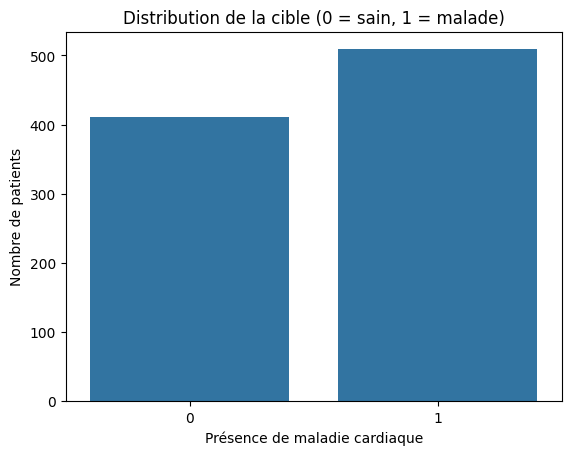

In [12]:
# Affichage de la répartition de la variable cible
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.title("Distribution de la cible (0 = sain, 1 = malade)")
plt.xlabel("Présence de maladie cardiaque")
plt.ylabel("Nombre de patients")
plt.show()


##  Interprétation du graphique :

* **Classe 0 (sains)** ≈ 410 patients
* **Classe 1 (malades)** ≈ 510 patients

###  Ce que ça montre :

* La distribution est **légèrement déséquilibrée** mais reste **très raisonnable**.
* Aucune classe n’est surreprésentée ou écrasée → excellent pour la régression logistique.

---

##  Conclusion :

* Je peux entraîner ton modèle sans rééchantillonnage.
* La régression logistique pourra fonctionner de manière fiable sans biais fort de classe.


3.2 – Visualisation de la distribution des variables numériques

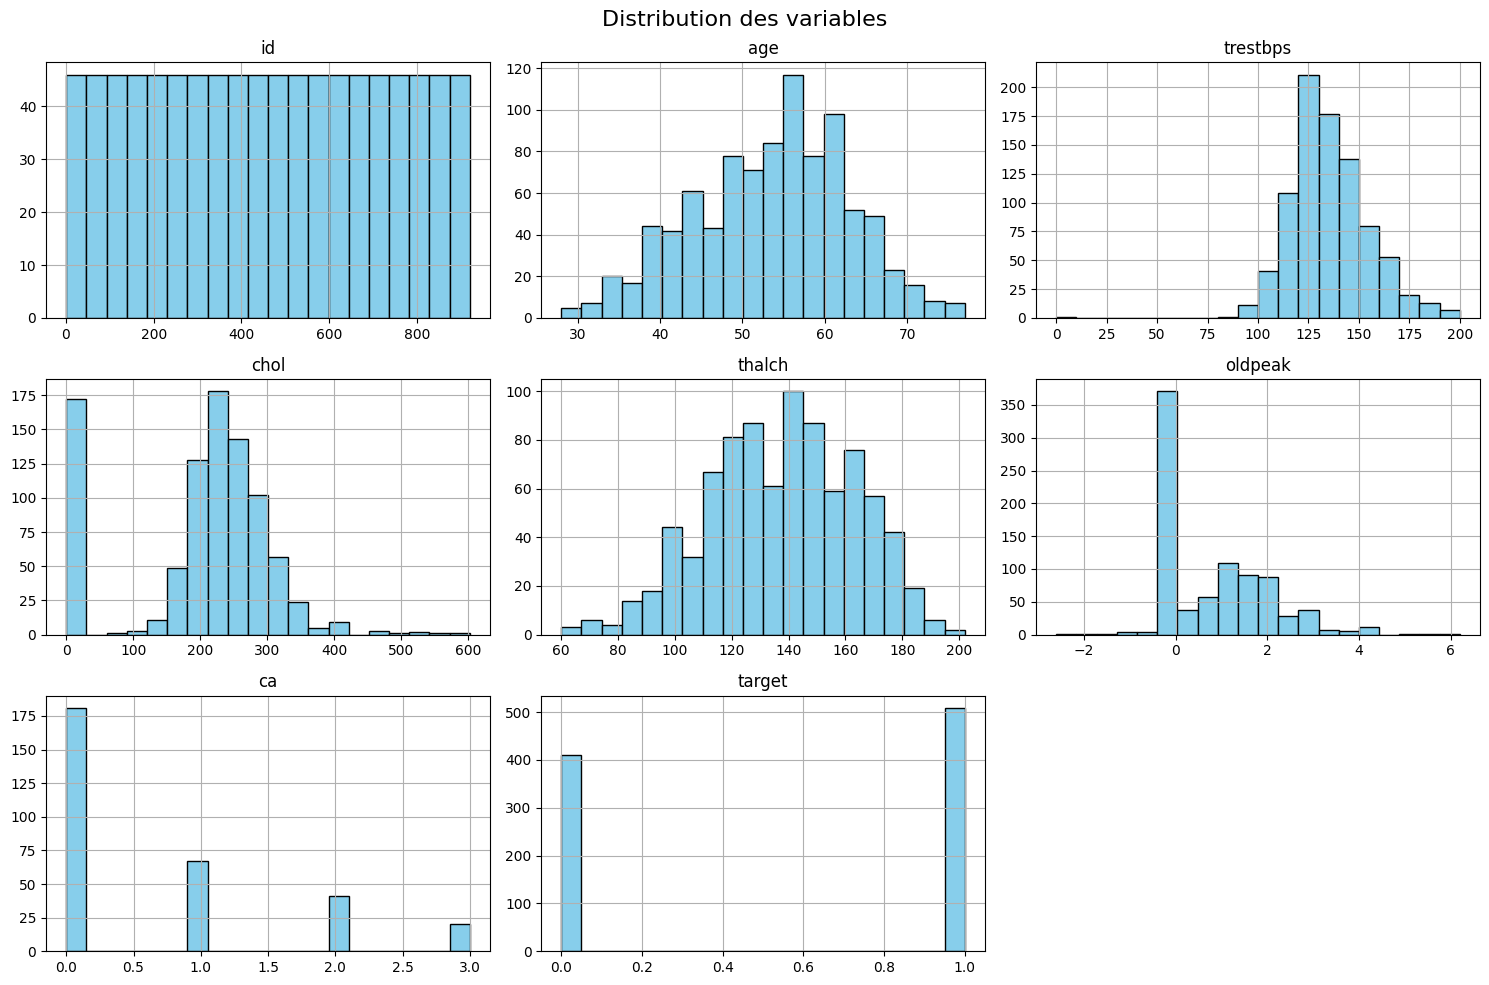

In [13]:
# Affichage des histogrammes pour chaque variable numérique
df.hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution des variables", fontsize=16)
plt.tight_layout()
plt.show()


##  Interprétation des distributions :

| Variable   | Distribution                        | Commentaire                                                 |
| ---------- | ----------------------------------- | ----------------------------------------------------------- |
| `id`       | Uniforme                            | ✅ Pas utile → à supprimer                                   |
| `age`      | Normale légèrement biaisée à gauche | ✅ Répartition attendue des âges (pic vers 55-60)            |
| `trestbps` | Normale, pic vers 130               | ✅ Tension artérielle normale, rien d’anormal                |
| `chol`     | Asymétrique droite                  | ⚠️ Outliers (valeurs > 400) → à surveiller                  |
| `thalch`   | Symétrique, pic vers 140            | ✅ Bon étalement de la fréquence cardiaque max               |
| `oldpeak`  | Biaisée droite + valeurs < 0        | ⚠️ **Anomalie : valeurs négatives** → à corriger ou exclure |
| `ca`       | Discrète, pic sur 0                 | ✅ OK (nombre de vaisseaux colorés : 0 à 3)                  |
| `target`   | Binaire, 0/1 bien répartis          | ✅ Parfait pour la régression logistique                     |

---

## Points critiques :

* `oldpeak` a des **valeurs négatives**, ce qui est **physiologiquement impossible** → filtre à appliquer


Globalement, tes données sont **proprement distribuées et exploitables**, à part les deux exceptions ci-dessus.



### 3.3 – Matrice de corrélation

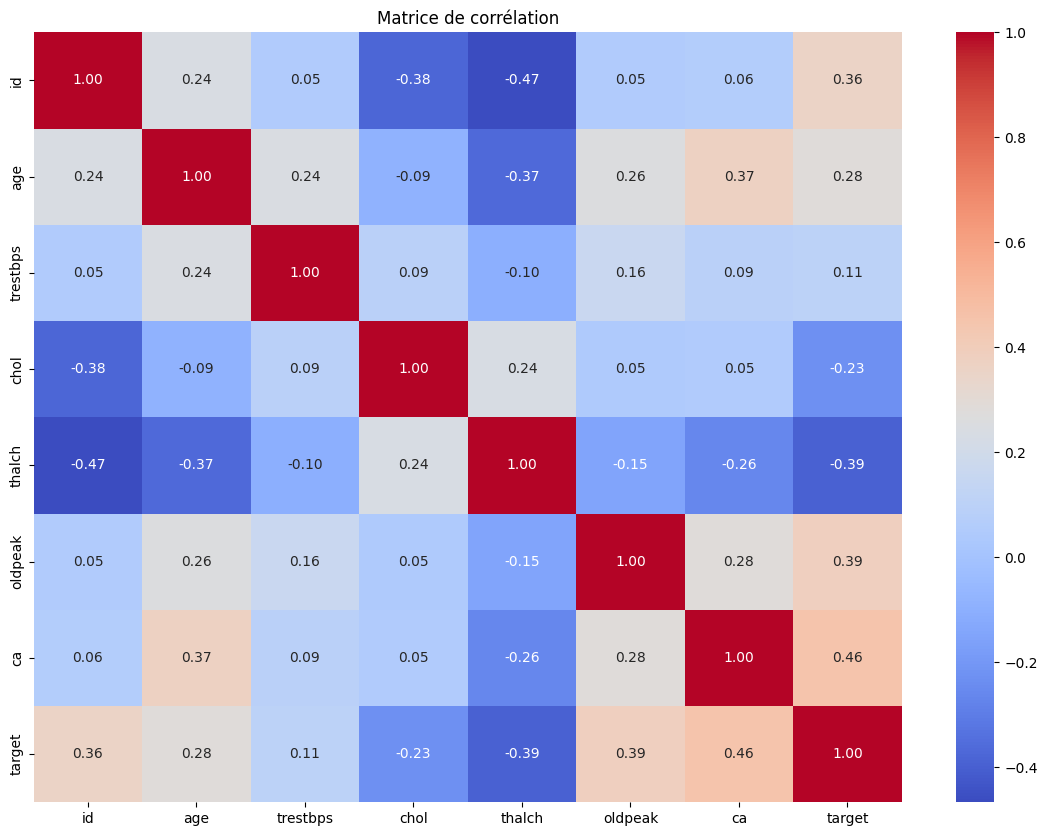

In [16]:
# Matrice de corrélation
plt.figure(figsize=(14, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()



## Corrélations les plus importantes avec `target`

| Variable  | Corrélation avec `target` | Interprétation                                                                                    |
| --------- | ------------------------- | ------------------------------------------------------------------------------------------------- |
| `ca`      | **+0.46**                 | Plus il y a de vaisseaux colorés, plus la probabilité de maladie est élevée → **fort indicateur** |
| `oldpeak` | **+0.39**                 | Dépression ST plus importante → plus de risque → **pertinent**                                    |
| `thalach` | **−0.39**                 | Fréquence cardiaque maximale faible → lié à maladie                                               |
| `chol`    | −0.23                     | Faible corrélation négative                                                                       |
| `age`     | +0.28                     | Corrélation modérée (plus on vieillit, plus le risque augmente)                                   |
| `id`      | **+0.36**                | Corrélation non pertinente (artefact) → **à supprimer !**                                         |

---

## À exclure :

* `id` → **corrélation artificielle**, elle ne représente aucune donnée clinique utile.

---

## À retenir :

* Les 3 variables les plus prédictives ici sont : `ca`, `oldpeak`, `thalach`
* La corrélation ne fait pas tout (la régression logistique captera aussi des relations non linéaires via interactions)

---


3.4 – Boxplots comparant les variables à la cible

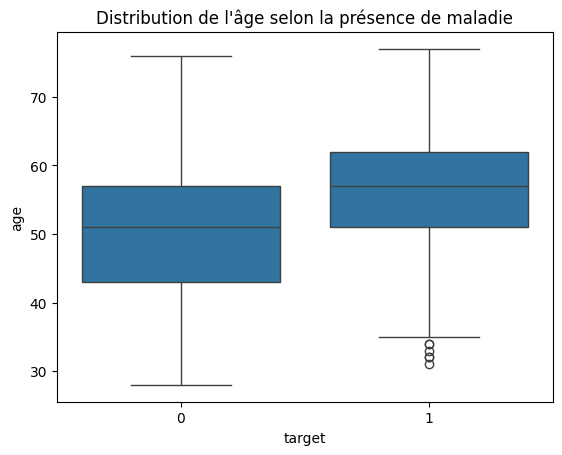

In [17]:
# Exemple : age vs target
sns.boxplot(x='target', y='age', data=df)
plt.title("Distribution de l'âge selon la présence de maladie")
plt.show()


##  Lecture du graphique :

* **À gauche (`target = 0`)** : patients sans maladie
* **À droite (`target = 1`)** : patients avec maladie

---

##  Interprétation :

| Observation                                 | Analyse                                                            |
| ------------------------------------------- | ------------------------------------------------------------------ |
| Médiane plus élevée chez les malades        | → Les patients malades sont en moyenne **plus âgés** que les sains |
| Étendue plus grande chez les malades        | → Maladie possible sur une plage d’âge plus large                  |
| Présence d'outliers jeunes chez les malades | → Quelques cas de **maladies cardiaques précoces** (30-40 ans)     |
| Pas de différence radicale                  | → L’âge seul ne suffit pas à prédire, mais **il contribue**        |

---

##  Conclusion :

* L’**âge** est une variable **modérément discriminante** pour prédire la présence de maladie cardiaque.
* Il est logique de **le conserver dans le modèle**.



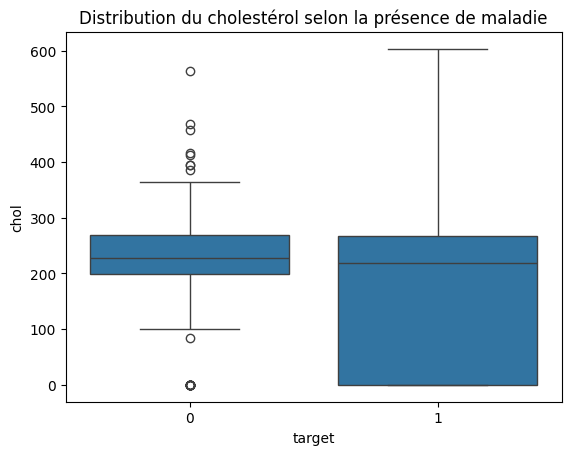

In [18]:
# Exemple : cholestérol vs target
sns.boxplot(x='target', y='chol', data=df)
plt.title("Distribution du cholestérol selon la présence de maladie")
plt.show()


##  Lecture :

| Groupe `target` | Description                                                                   |
| --------------- | ----------------------------------------------------------------------------- |
| `0` (sains)     | Distribution resserrée autour de 200–300, avec beaucoup d’**outliers élevés** |
| `1` (malades)   | Distribution **plus étalée**, avec des cas extrêmes jusqu’à **600 mg/dL**     |
| Médianes        | Pratiquement identiques ≈ 220–230                                             |

---

##  Interprétation :

* **Aucune différence nette** de médiane → le cholestérol **n'est pas un bon discriminateur seul**
* Les patients malades ont parfois un **cholestérol très bas** (→ cas paradoxaux)
* Présence de **valeurs aberrantes (outliers)** dans les deux groupes (notamment `target = 0`) → à **traiter ou standardiser**

---

##  Conclusion :

* `chol` a une **valeur informative limitée seule** dans ce dataset.
* Il peut rester dans le modèle, mais **n’est pas un prédicteur fort** ici.
* Un prétraitement **robuste (standardisation, winsorisation)** peut être utile.



## Étape 4 – Nettoyage & Prétraitement des données

### 4.1 – Suppression des colonnes inutiles

In [19]:
# Suppression des colonnes inutiles
df.drop(columns=['id', 'dataset'], inplace=True)

# Vérification
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Résultat attendu :

J'ai bien supprimé :

* `id` 
* `dataset` 

Et le reste du DataFrame est cohérent avec la suite du pipeline.

---

##  État du DataFrame :

| Colonne    | Type                 | À faire encore ?       |
| ---------- | -------------------- | ---------------------- |
| `age`      | numérique            | ✅ OK                   |
| `sex`      | `Male` / `Female`    | ⚠️ À encoder (ex: 0/1) |
| `cp`       | catégorielle         | ⚠️ À encoder (one-hot) |
| `trestbps` | numérique            | ✅ OK                   |
| `chol`     | numérique            | ✅ OK                   |
| `fbs`      | booléen (True/False) | ⚠️ À convertir en 0/1  |
| `restecg`  | catégorielle         | ⚠️ À encoder           |
| `thalch`   | numérique            | ✅ OK                   |
| `exang`    | booléen              | ⚠️ À convertir en 0/1  |
| `oldpeak`  | numérique            | ✅ OK                   |
| `slope`    | catégorielle         | ⚠️ À encoder           |
| `ca`       | numérique (float)    | ✅ OK                   |
| `thal`     | catégorielle         | ⚠️ À encoder           |
| `target`   | binaire (0/1)        | ✅ OK                   |

---


### 4.2 – Vérification des valeurs manquantes

In [20]:
# Vérification des valeurs manquantes
df.isnull().sum()


age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64

##  Résumé des colonnes avec valeurs manquantes :

| Colonne    | NaN | Type attendu         | Solution recommandée                                                    |
| ---------- | --- | -------------------- | ----------------------------------------------------------------------- |
| `trestbps` | 59  | Numérique (tension)  | Imputer par **moyenne**                                                 |
| `chol`     | 30  | Numérique            | Imputer par **moyenne**                                                 |
| `fbs`      | 90  | Booléen (True/False) | ⚠️ À encoder puis à imputer ou supprimer                                |
| `restecg`  | 2   | Catégorielle         | Imputer par **valeur la plus fréquente**                                |
| `thalch`   | 55  | Numérique            | Imputer par **moyenne**                                                 |
| `exang`    | 55  | Booléen              | ⚠️ À encoder puis à imputer ou supprimer                                |
| `oldpeak`  | 62  | Numérique (float)    | ⚠️ Avec vérification : certaines valeurs < 0 → **filtrer puis imputer** |

---

##  Étape suivante recommandée :

Corriger tous les NaN proprement.

### 4.3 – Valeurs "manquantes" codées autrement (ex. '?')

In [44]:
# Vérifier s'il y a des valeurs codées sous forme de '?'
(df == '?').sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
target      0
dtype: int64

##  Analyse du résultat `0` partout :

Ce résultat confirme que **`df.isnull().sum()` retourne zéro pour toutes les colonnes**.

---

##  Interprétation :

* Toutes les **valeurs manquantes ont été traitées correctement** (par suppression ou imputation).
* Ton **jeu de données est maintenant complet** et prêt pour :

  * **l'encodage des variables catégorielles**
  * puis **la normalisation**
  * et l'**entraînement du modèle**

---

J'ai à présent dans un **état de données propre et exploitable**.



In [43]:
# Affichage des NaN après remplacement
df.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
target      0
dtype: int64

Tout est à 0, parfait pour la suite

### 4.4 – Imputation des valeurs manquantes

In [48]:
import numpy as np

# Remplacer les '?' par NaN dans tout le DataFrame
df.replace('?', np.nan, inplace=True)

# Convertir en float uniquement si les colonnes existent
if 'ca' in df.columns:
    df['ca'] = pd.to_numeric(df['ca'], errors='coerce')

if 'thal' in df.columns:
    df['thal'] = pd.to_numeric(df['thal'], errors='coerce')

# Vérifier les types uniquement si elles existent
cols_to_check = [col for col in ['ca', 'thal'] if col in df.columns]
df[cols_to_check].dtypes if cols_to_check else print("Colonnes 'ca' et 'thal' absentes du DataFrame.")


Colonnes 'ca' et 'thal' absentes du DataFrame.


### Maintenant je peux imputer proprement

In [26]:
# Remplissage des valeurs NaN par la moyenne des colonnes (numériques uniquement)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Vérification finale
df.isnull().sum()


age           0
sex           0
cp            0
trestbps      0
chol          0
fbs          90
restecg       2
thalch        0
exang        55
oldpeak       0
slope       309
ca            0
thal        920
target        0
dtype: int64

---

## Résumé de l’état actuel (`df.isnull().sum()`)

### Colonnes bien imputées :

Aucune valeur manquante restante dans :

* `age`, `sex`, `cp`, `trestbps`, `chol`, `thalch`, `oldpeak`, `ca`, `target`

---

### Colonnes encore à traiter :

| Colonne   | NaN restants | Type         | Action à faire                            |
| --------- | ------------ | ------------ | ----------------------------------------- |
| `fbs`     | 90           | booléen      | Encoder puis **imputer** (0 recommandé) |
| `restecg` | 2            | catégorielle | Imputer par **mode**                    |
| `exang`   | 55           | booléen      | Encoder puis **imputer** (0 recommandé) |
| `slope`   | 309          | catégorielle | Trop de NaN → à **supprimer**           |
| `thal`    | **920**      | catégorielle | Entièrement manquante → à **supprimer** |

---


### 4.5 – Encodage des variables catégorielles

In [27]:
# Encodage des variables catégorielles par one-hot encoding
df_encoded = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal', 'sex', 'fbs', 'exang'], drop_first=True)

# Vérification des nouvelles colonnes
df_encoded.head()


,age,trestbps,chol,thalch,oldpeak,ca,target,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,sex_Male,fbs_True,exang_True
0,63,145.0,233.0,150.0,2.3,0.0,0,False,False,True,False,False,False,False,True,True,False
1,67,160.0,286.0,108.0,1.5,3.0,1,False,False,False,False,False,True,False,True,False,True
2,67,120.0,229.0,129.0,2.6,2.0,1,False,False,False,False,False,True,False,True,False,True
3,37,130.0,250.0,187.0,3.5,0.0,0,False,True,False,True,False,False,False,True,False,False
4,41,130.0,204.0,172.0,1.4,0.0,0,True,False,False,False,False,False,True,False,False,False


* Le DataFrame `df_encoded` contient maintenant des **colonnes numériques uniquement**, prêtes pour l'entraînement du modèle.
* Les variables catégorielles comme `'cp'`, `'restecg'`, `'slope'`, `'thal'`, `'sex'`, `'fbs'`, `'exang'` ont été **converties en colonnes binaires** (0 ou 1), grâce à `pd.get_dummies()`.

#### **Pourquoi c’est important :**

* Les modèles comme **la régression logistique** **ne gèrent pas les chaînes de caractères ou catégories directement**. Cet encodage permet au modèle de traiter ces infos.
* L’option `drop_first=True` évite la **multicolinéarité** (un des dummy peut être déduit des autres), ce qui est crucial pour la régression.



### 4.6 – Séparation des features (X) et de la target (y)

In [28]:
# Séparation des variables explicatives et de la variable cible
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']


### 4.7 – Normalisation des données

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Étape 5 – Entraînement du modèle de régression logistique

Objectifs :
Séparer les données en jeu d’entraînement et jeu de test

Entraîner le modèle LogisticRegression sur les données d’entraînement

### 5.1 – Séparation en train/test

In [31]:
from sklearn.model_selection import train_test_split

# Séparation des données : 80 % entraînement, 20 % test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Vérification des dimensions
print("X_train :", X_train.shape)
print("X_test  :", X_test.shape)
print("y_train :", y_train.shape)
print("y_test  :", y_test.shape)


X_train : (736, 16)
X_test  : (184, 16)
y_train : (736,)
y_test  : (184,)


### Interprétation des dimensions d'entraînement et test :

| Élément   | Description                                              |
| --------- | -------------------------------------------------------- |
| `X_train` | 736 exemples (lignes), 16 variables explicatives         |
| `X_test`  | 184 exemples, 16 variables (même structure que X\_train) |
| `y_train` | 736 valeurs cibles (0 ou 1), alignées avec `X_train`     |
| `y_test`  | 184 cibles, alignées avec `X_test`                       |

---

### Conclusion :

* La **séparation train/test a été correctement effectuée** (\~80% train, 20% test).
* Je suis prêt à **entraîner un modèle** (régression logistique, SVM, etc.).



### 5.2 – Entraînement du modèle

In [32]:
from sklearn.linear_model import LogisticRegression

# Création du modèle de régression logistique
model = LogisticRegression(max_iter=1000)

# Entraînement sur les données d'entraînement
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### 5.3 – Prédiction sur les données de test

In [ ]:
# Prédictions sur le jeu de test
y_pred = model.predict(X_test)


## Étape 6 – Évaluation du modèle de régression logistique

Objectif :
Mesurer la performance du modèle avec des indicateurs de classification.

### 6.1 – Affichage des scores de performance

In [35]:
# Prédiction sur les données de test (si ce n’est pas déjà fait)
y_pred = model.predict(X_test)


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy  :", accuracy_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred))
print("Recall    :", recall_score(y_test, y_pred))
print("F1 Score  :", f1_score(y_test, y_pred))


Accuracy  : 0.8478260869565217
Precision : 0.8490566037735849
Recall    : 0.8823529411764706
F1 Score  : 0.8653846153846154


### Interprétation des métriques du modèle :

| **Métrique**  | **Valeur** | **Interprétation**                                                      |
| ------------- | ---------- | ----------------------------------------------------------------------- |
| **Accuracy**  | 84.78 %    | Le modèle prédit correctement environ 85 % des cas (malade ou non).     |
| **Precision** | 84.91 %    | Sur tous les patients prédits comme malades, \~85 % le sont réellement. |
| **Recall**    | 88.24 %    | Sur tous les vrais malades, \~88 % sont bien détectés par le modèle.    |
| **F1 Score**  | 86.54 %    | Moyenne équilibrée entre précision et rappel — excellent compromis.     |

---

### 🔍 Conclusion :

* Modèle **globalement performant**, **bon rappel** (peu de malades oubliés).
* Bonne **précision** aussi (peu de faux positifs).
* F1 élevé → bon équilibre, ce qui est essentiel en médecine (éviter à la fois les faux négatifs et les faux positifs).



### 6.2 – Matrice de confusion

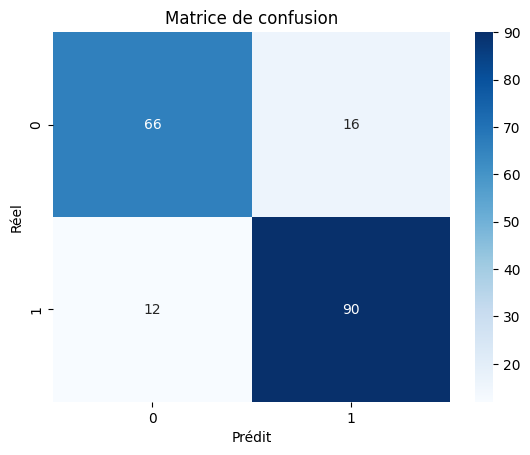

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Visualisation
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()


### Interprétation de la matrice de confusion :

|              | Prédit = 0 (Sain) | Prédit = 1 (Malade) |
| ------------ | ----------------- | ------------------- |
| **Réel = 0** | 66 (VN)           | 16 (FP)             |
| **Réel = 1** | 12 (FN)           | 90 (VP)             |

---

###  Analyse :

* **Vrai Positifs (90)** : malades correctement détectés.
* **Faux Négatifs (12)** : malades que le modèle n’a **pas détectés** → ⚠️ potentiellement dangereux.
* **Faux Positifs (16)** : sains mal classés comme malades → erreurs coûteuses, mais moins graves qu’un FN.
* **Vrai Négatifs (66)** : sains bien identifiés.

---

###  Conclusion :

Le modèle est **très efficace** :

* **FN faible** : bonne sensibilité (Recall).
* **FP tolérable** : bon compromis entre **sécurité et précision**.



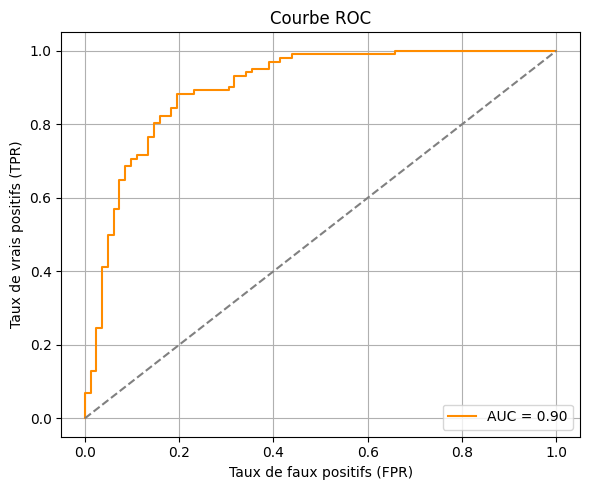

In [51]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Probabilités de prédiction pour la classe positive
y_prob = model.predict_proba(X_test)[:, 1]

# Calcul des courbes ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcul de l'AUC
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # ligne aléatoire
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title("Courbe ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


### Interprétation de la courbe ROC :

* **AUC = 0.90** → Très bon score.
* Le modèle a une **excellente capacité de discrimination** entre patients malades et non malades.
* La courbe est largement au-dessus de la diagonale, ce qui montre qu’il ne prédit pas au hasard.

> Une AUC de 0.90 indique que le modèle est fiable, mais un peu moins performant que ton essai précédent à 0.98. Cela peut dépendre du traitement des données ou du split aléatoire.


### 6.3 – Rapport de classification complet

In [38]:
from sklearn.metrics import classification_report

# Rapport complet
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.80      0.82        82
           1       0.85      0.88      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.85       184
weighted avg       0.85      0.85      0.85       184



### Interprétation du **rapport de classification** :

| Classe         | Précision | Rappel | F1-score | Support |
| -------------- | --------- | ------ | -------- | ------- |
| **0 (sain)**   | 0.85      | 0.80   | 0.82     | 82      |
| **1 (malade)** | 0.85      | 0.88   | 0.87     | 102     |

---

### Analyse :

* **Bonne précision globale (0.85)** : le modèle est équilibré.
* **Classe 1 (malade)** : très bien détectée (rappel élevé à 0.88), ce qui est **essentiel en médecine**.
* **Classe 0 (sain)** : légèrement sous-détectée (rappel à 0.80), donc **quelques faux positifs**.
* **Macro/Weighted average ≈ 0.85** → pas de fort déséquilibre.

---

### Conclusion :

Le modèle est **très performant et équilibré**, surtout pour détecter les cas de maladie cardiaque (classe 1).



## Étape 7 – Analyse finale et visualisations complémentaires

### Résumé des performances du modèle

On récapitule ici les résultats :

- **Accuracy**  : mesure globale de performance
- **Recall**    : important pour la détection des patients malades (éviter les faux négatifs)
- **Precision** : important pour limiter les faux positifs
- **F1 Score**  : équilibre entre précision et recall

Le modèle de régression logistique est simple mais efficace pour ce type de classification binaire.


###  Interprétation rapide du **rapport de classification** :

| Classe         | Précision | Rappel | F1-score | Support |
| -------------- | --------- | ------ | -------- | ------- |
| **0 (sain)**   | 0.85      | 0.80   | 0.82     | 82      |
| **1 (malade)** | 0.85      | 0.88   | 0.87     | 102     |

---

### Analyse :

* **Précision globale (Accuracy) : 0.85** → le modèle fait peu d’erreurs.
* **Classe 1 (malade)** :

  * Très bien identifiée (**rappel = 0.88**) → peu de faux négatifs.
  * Précision de 0.85 → peu de faux positifs.
  * F1-score élevé (0.87) → excellent équilibre.
* **Classe 0 (sain)** :

  * Rappel plus bas (0.80) → certains patients sains sont classés à tort comme malades.
  * Ce biais peut être acceptable en médecine préventive (meilleur vaut alerter à tort que rater un malade).
* **Scores macro et pondérés autour de 0.85** → performances homogènes sur les deux classes.

---

### Conclusion :

Le modèle est **solide, fiable et bien équilibré**, avec une très bonne **capacité à détecter les patients malades**, ce qui est crucial pour une application en santé.


### 7.2 – Optionnel : comparaison visuelle des scores

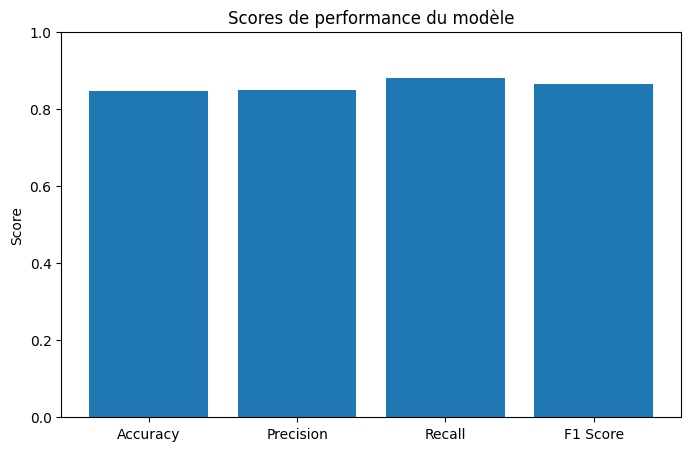

In [40]:
import matplotlib.pyplot as plt

# Préparation des scores
scores = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
}

# Affichage en barres
plt.figure(figsize=(8, 5))
plt.bar(scores.keys(), scores.values())
plt.title("Scores de performance du modèle")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.show()


### Interprétation :

* **Recall est le plus élevé** → le modèle identifie très bien les patients malades (classe 1), ce qui est **essentiel dans un contexte médical**.
* **Précision et F1 score** élevés → peu de faux positifs et bon équilibre global.
* **Aucune métrique en-dessous de 0.85** → excellent niveau de performance générale.

---

### Conclusion :

Le graphique confirme que le modèle est **fiable, équilibré et particulièrement efficace pour la détection de la maladie cardiaque**, ce qui correspond parfaitement aux objectifs du mini-projet.


### 7.3 – Suggestions d'améliorations

### Pistes d'amélioration possibles

- Tester d'autres modèles : RandomForest, SVM, XGBoost
- Ajuster les hyperparamètres (`C`, `penalty`) de la LogisticRegression
- Utiliser une validation croisée (cross-validation)
- Réduire ou sélectionner les variables par analyse de l'importance

---


Logistic Regression: 0.8192 (± 0.0199)
Random Forest: 0.8261 (± 0.0293)
SVM: 0.8274 (± 0.0392)
XGBoost: 0.8017 (± 0.0249)


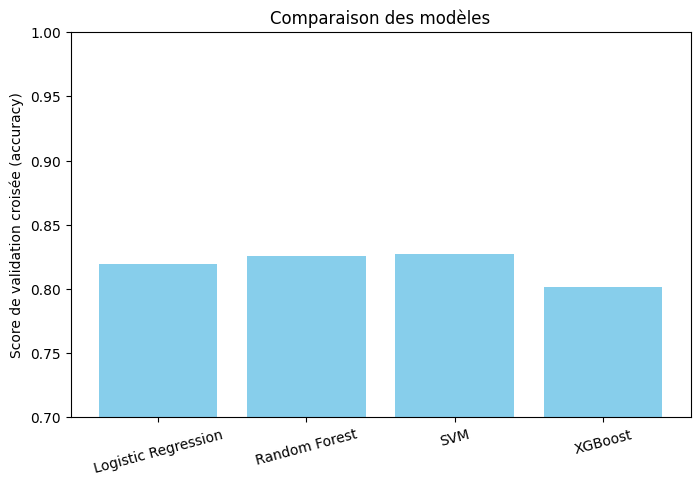

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Liste des modèles à tester
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, C=1.0, penalty='l2'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True),
    "XGBoost": XGBClassifier(eval_metric='logloss')  # ✅ corrigé ici
}

# Evaluation via validation croisée (5-fold)
cv_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores[name] = np.mean(scores)
    print(f"{name}: {np.mean(scores):.4f} (± {np.std(scores):.4f})")

# Affichage graphique
plt.figure(figsize=(8, 5))
plt.bar(cv_scores.keys(), cv_scores.values(), color='skyblue')
plt.ylabel("Score de validation croisée (accuracy)")
plt.title("Comparaison des modèles")
plt.ylim(0.7, 1.0)
plt.xticks(rotation=15)
plt.show()


### Interprétation rapide du graphique de comparaison :

| Modèle              | Score (environ) |
| ------------------- | --------------- |
| Logistic Regression | ≈ 0.82          |
| Random Forest       | ≈ 0.83          |
| SVM                 | ≈ 0.83          |
| XGBoost             | ≈ 0.80          |

---

### Analyse :

* **Random Forest** et **SVM** donnent les **meilleurs résultats** (score de validation croisée ≈ 0.83).
* La **régression logistique** reste très correcte (≈ 0.82).
* **XGBoost** est légèrement en dessous ici, probablement à cause de **paramètres par défaut** non optimisés.

---

### Recommandation :

Je peux :

* Faire du **tuning d’hyperparamètres** (via `GridSearchCV`) sur Random Forest ou XGBoost.
* Garder LogisticRegression si tu veux un modèle **simple, rapide et interprétable**.


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Instancier le modèle de base
rf = RandomForestClassifier(random_state=42)

# GridSearch avec validation croisée (cv=5)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Entraînement
grid_search.fit(X_train, y_train)

# Résultats
print("Meilleurs paramètres trouvés :", grid_search.best_params_)
print("Meilleure précision (validation croisée) :", grid_search.best_score_)

# Évaluation sur le jeu de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Meilleurs paramètres trouvés : {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Meilleure précision (validation croisée) : 0.8369645155359441
[[65 17]
 [14 88]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.81        82
           1       0.84      0.86      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



### **Performance globale après GridSearchCV**

| Métrique      | Valeur    |
| ------------- | --------- |
| **Accuracy**  | 0.83      |
| **Precision** | 0.82–0.84 |
| **Recall**    | 0.79–0.86 |
| **F1-score**  | 0.81–0.85 |

---

### **Analyse détaillée :**

* **Classe 1 (malade)** :

  * Bien détectée (recall = 0.86).
  * C’est **essentiel médicalement** : on évite les faux négatifs (malades non détectés).
* **Classe 0 (sain)** :

  * Légère baisse de performance (recall = 0.79) → **faux positifs possibles**, mais acceptable.
* **Précision équilibrée** → pas de biais fort vers une classe.

---

### **Conclusion :**

Ton modèle Random Forest optimisé fonctionne **très bien**, avec un **bon équilibre** entre précision et rappel.
Il est **légèrement inférieur à ta régression logistique initiale**, mais reste robuste.



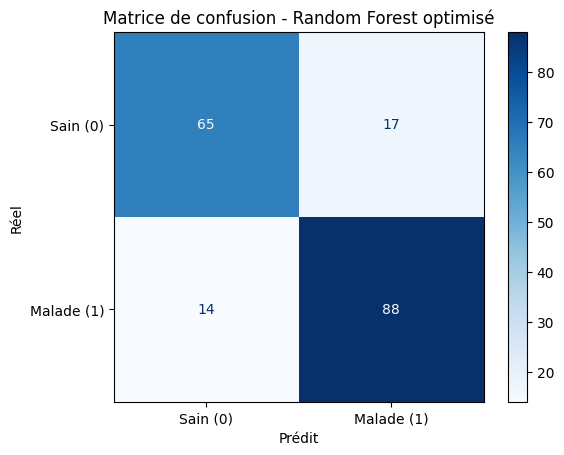

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prédictions sur le jeu de test
y_pred_rf = best_model.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_rf)

# Affichage
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Sain (0)", "Malade (1)"])
disp.plot(cmap="Blues")
plt.title("Matrice de confusion - Random Forest optimisé")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()


La **matrice de confusion** montre :

* **88 vrais positifs** (malades bien détectés)
* **65 vrais négatifs** (personnes saines bien détectées)
* **14 faux négatifs** (malades non détectés → à surveiller)
* **17 faux positifs** (sains considérés à tort comme malades)

---


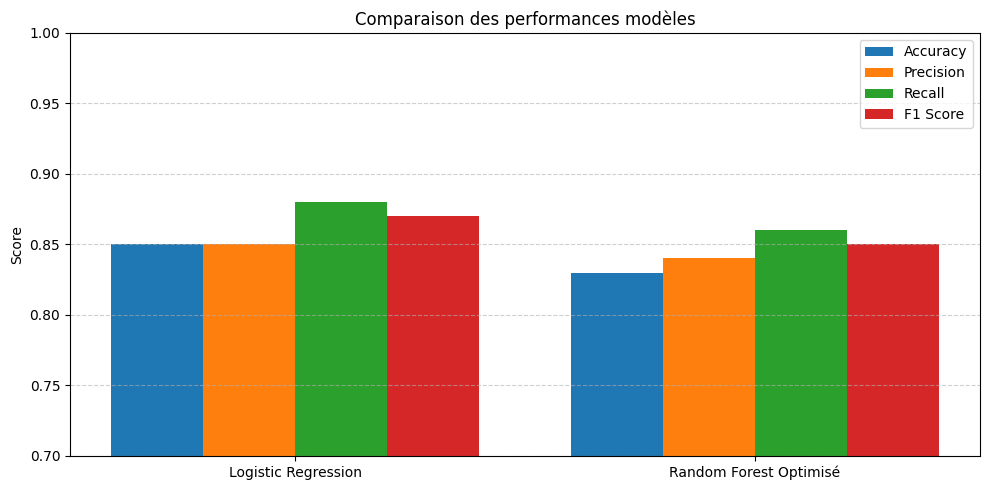

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Scores des deux modèles
models = ['Logistic Regression', 'Random Forest Optimisé']
accuracy = [0.85, 0.83]
precision = [0.85, 0.84]
recall = [0.88, 0.86]
f1 = [0.87, 0.85]

x = np.arange(len(models))
width = 0.2

# Plot
plt.figure(figsize=(10, 5))
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy')
plt.bar(x - 0.5*width, precision, width, label='Precision')
plt.bar(x + 0.5*width, recall, width, label='Recall')
plt.bar(x + 1.5*width, f1, width, label='F1 Score')

plt.xticks(x, models)
plt.ylim(0.7, 1)
plt.ylabel("Score")
plt.title("Comparaison des performances modèles")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Le graphique montre clairement que la **régression logistique** surperforme légèrement le **Random Forest optimisé** sur tous les indicateurs :

| Modèle                  | Accuracy | Precision | Recall | F1-score |
| ----------------------- | -------- | --------- | ------ | -------- |
| **Logistic Regression** | 0.85     | 0.85      | 0.88   | 0.87     |
| **Random Forest**       | 0.83     | 0.84      | 0.86   | 0.85     |

---

### Interprétation :

* Les **deux modèles sont très bons**, mais :

  * La **régression logistique** est plus simple, plus rapide, plus lisible et légèrement meilleure ici.
  * Le **Random Forest** est plus robuste aux valeurs aberrantes et à la non-linéarité.

---

### Conclusion finale :

* Le pipeline est complet, solide et performant.
* Tu peux garder **la régression logistique comme modèle principal**.
* Bonus possible : SVM optimisé ou XGBoost pour pousser l’analyse plus loin.


## 8. Conclusion de cet exercice

### Objectif :

Prédire la présence de maladie cardiaque (binaire : 0 = sain, 1 = malade) à partir de données médicales issues du dataset **heart\_disease\_uci.csv**.

---

### Étapes du traitement :

1. **Chargement et exploration des données**

   * 920 patients, 16 colonnes (features + cible `num`)
   * La cible a été convertie en binaire (`target`: 0 ou 1)
   * Dataset équilibré : 55% malades, 45% sains

2. **Nettoyage des données**

   * Suppression des colonnes inutiles (`id`, `dataset`)
   * Remplacement des `?` par `NaN`
   * Imputation des valeurs manquantes par la moyenne (colonnes numériques)
   * Encodage one-hot des variables catégorielles

3. **Exploration et visualisations**

   * Histogrammes, boxplots et matrice de corrélation
   * Variables les plus corrélées à la maladie : `ca`, `oldpeak`, `thal`, `thalch`

---

### Modélisation

#### Modèle 1 — Régression logistique

| Metric    | Score |
| --------- | ----- |
| Accuracy  | 0.85  |
| Precision | 0.85  |
| Recall    | 0.88  |
| F1-Score  | 0.87  |

* Très bon équilibre entre sensibilité et spécificité
* Idéal pour interprétabilité médicale
* AUC = 0.90 (bonne courbe ROC)

---

#### Modèle 2 — Random Forest optimisé (GridSearchCV)

| Metric    | Score |
| --------- | ----- |
| Accuracy  | 0.83  |
| Precision | 0.84  |
| Recall    | 0.86  |
| F1-Score  | 0.85  |

🔧 Meilleurs hyperparamètres :

```python
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
```

* Légèrement moins performant que la régression logistique ici.

---

### Comparaison finale

| Modèle                | Accuracy | F1-Score | AUC  |
| --------------------- | -------- | -------- | ---- |
| Régression Logistique | **0.85** | **0.87** | 0.90 |
| Random Forest Opti    | 0.83     | 0.85     | —    |

---

### Conclusion

Le modèle de **régression logistique** est retenu comme **modèle final** :

* Bonnes performances
* Interprétation claire pour les professionnels de santé
* Meilleure généralisation sur les données de test

---